In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as spc
from scipy.cluster.hierarchy import linkage
from scipy.spatial.distance import pdist

In [2]:
df = pd.read_csv("GlnR Transcriptomics Data ACT.csv", index_col= 'Locus_tag')
df

,18,20,22,26,30,32,34,38,44,50
Locus_tag,,,,,,,,,,
SCO2198_A,642.520261,640.366462,697.287581,117.663128,116.245237,106.163343,128.348404,204.585789,147.904874,234.870479
SCO5583_A,99.083960,93.529790,111.494336,14.403009,9.442913,6.435247,5.800684,5.060663,4.613126,6.341441
SCO5584_A,184.197174,134.347311,183.890206,21.420243,13.931832,9.588802,8.178584,6.543176,8.159821,8.776624
SCO5585_A,33.462992,23.969531,29.886670,3.602574,3.124284,2.116954,2.411953,2.308132,1.838237,2.391762
SCO2210_A,732.027049,707.875984,873.024767,79.601508,36.195518,25.303474,22.078719,22.751732,18.063608,25.807670
...,...,...,...,...,...,...,...,...,...,...
SCO6148_R,110.605217,109.887945,85.595487,87.963882,95.385017,68.485261,93.574886,96.844262,77.162592,68.534105
SCO1864_R,245.517361,183.952215,198.210681,104.054702,155.567493,134.121737,121.946560,99.237701,37.588843,35.546901
SCO1865_R,76.368136,64.846048,76.952371,48.937912,69.955629,60.565499,63.091534,52.399607,26.159066,31.652671


In [3]:
df1 = df.transpose()

In [4]:
df1

Locus_tag,SCO2198_A,SCO5583_A,SCO5584_A,SCO5585_A,SCO2210_A,SCO2487_A,SCO2488_A,SCO2400_A,SCO1863_A,SCO2195_A,...,SCO2789_R,SCO3874_R,SCO4164_R,SCO4471_R,SCO6102_R,SCO6148_R,SCO1864_R,SCO1865_R,SCO1866_R,SCO1867_R
18,642.520261,99.083960,184.197174,33.462992,732.027049,9.839920,6.326337,2.171199,4.154864,173.684304,...,59.082348,117.877058,715.145261,70.634354,269.408058,110.605217,245.517361,76.368136,782.648721,1020.294033
20,640.366462,93.529790,134.347311,23.969531,707.875984,8.098484,5.974516,2.150826,4.535935,179.484430,...,36.113290,118.133669,662.027262,96.530523,226.672729,109.887945,183.952215,64.846048,650.099256,746.857070
22,697.287581,111.494336,183.890206,29.886670,873.024767,9.879388,10.106473,2.351554,3.833330,226.110917,...,43.393894,107.624847,534.888627,95.509669,192.753565,85.595487,198.210681,76.952371,626.820264,783.261091
26,117.663128,14.403009,21.420243,3.602574,79.601508,3.326708,1.819705,1.404252,2.406096,35.670881,...,24.727475,105.294712,567.807480,57.991333,165.999224,87.963882,104.054702,48.937912,288.546884,358.164541
30,116.245237,9.442913,13.931832,3.124284,36.195518,3.856962,1.897397,1.717415,3.164769,54.166153,...,32.384560,127.493683,782.327149,56.313426,206.048067,95.385017,155.567493,69.955629,482.619413,471.117670
32,106.163343,6.435247,9.588802,2.116954,25.303474,2.630140,2.462579,1.516949,2.795360,31.352276,...,28.548576,88.796218,582.559979,46.752978,164.125510,68.485261,134.121737,60.565499,387.112447,454.107707
34,128.348404,5.800684,8.178584,2.411953,22.078719,2.639964,4.200818,1.949180,3.467997,30.339243,...,31.443748,120.288933,692.807287,47.926194,169.487430,93.574886,121.946560,63.091534,461.521475,529.392796
38,204.585789,5.060663,6.543176,2.308132,22.751732,2.171481,1.912658,2.308305,2.171125,40.325203,...,33.686585,121.956696,726.333267,53.684412,191.551572,96.844262,99.237701,52.399607,380.468937,500.962718
44,147.904874,4.613126,8.159821,1.838237,18.063608,1.762347,1.721016,2.138110,2.167003,135.116653,...,17.817581,129.119105,447.856261,27.065851,151.575354,77.162592,37.588843,26.159066,149.004541,193.219297
50,234.870479,6.341441,8.776624,2.391762,25.807670,2.348052,2.060105,1.087735,2.908383,83.313050,...,21.090575,197.331871,368.931458,29.332351,107.563919,68.534105,35.546901,31.652671,150.339339,240.169287


In [5]:
corr = df1.corr().values
pdist = spc.distance.pdist(corr)
linkage = spc.linkage(pdist, method='complete')
idx = spc.fcluster(linkage, 0.5 * pdist.max(), 'distance')
idx

array([1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 5, 1, 1, 2, 3, 2, 4, 4, 5, 2, 4, 2,
       3, 5, 5, 4, 5, 5, 4, 3, 1, 2, 2, 5, 3, 3, 4, 2, 5, 5, 4, 4, 1, 4,
       1, 3, 4, 4, 2, 2, 5, 2, 2, 2, 2, 4, 1, 2, 2, 5, 3, 2, 1, 5, 1, 5,
       2, 1, 2, 2, 1, 2, 1, 1], dtype=int32)

In [6]:
df1.transpose()
df2 = df1.transpose()

In [7]:
df2['Ordered'] = [1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 5, 1, 1, 2, 3, 2, 4, 4, 5, 2, 4, 2,
       3, 5, 5, 4, 5, 5, 4, 3, 1, 2, 2, 5, 3, 3, 4, 2, 5, 5, 4, 4, 1, 4,
       1, 3, 4, 4, 2, 2, 5, 2, 2, 2, 2, 4, 1, 2, 2, 5, 3, 2, 1, 5, 1, 5,
       2, 1, 2, 2, 1, 2, 1, 1]

In [8]:
df2

,18,20,22,26,30,32,34,38,44,50,Ordered
Locus_tag,,,,,,,,,,,
SCO2198_A,642.520261,640.366462,697.287581,117.663128,116.245237,106.163343,128.348404,204.585789,147.904874,234.870479,1
SCO5583_A,99.083960,93.529790,111.494336,14.403009,9.442913,6.435247,5.800684,5.060663,4.613126,6.341441,1
SCO5584_A,184.197174,134.347311,183.890206,21.420243,13.931832,9.588802,8.178584,6.543176,8.159821,8.776624,1
SCO5585_A,33.462992,23.969531,29.886670,3.602574,3.124284,2.116954,2.411953,2.308132,1.838237,2.391762,1
SCO2210_A,732.027049,707.875984,873.024767,79.601508,36.195518,25.303474,22.078719,22.751732,18.063608,25.807670,1
...,...,...,...,...,...,...,...,...,...,...,...
SCO6148_R,110.605217,109.887945,85.595487,87.963882,95.385017,68.485261,93.574886,96.844262,77.162592,68.534105,2
SCO1864_R,245.517361,183.952215,198.210681,104.054702,155.567493,134.121737,121.946560,99.237701,37.588843,35.546901,1
SCO1865_R,76.368136,64.846048,76.952371,48.937912,69.955629,60.565499,63.091534,52.399607,26.159066,31.652671,2


In [9]:
df2.transpose()
df3 = df2.transpose()
df3.sort_values(by='Ordered', axis= 1)

Locus_tag,SCO2198_A,SCO1864_R,SCO4471_R,SCO2789_R,SCO0289_R,SCO1487_R,SCO0888_R,SCO1236_R,SCO1866_R,SCO1998_A,...,SCO3874_R,SCO3671_A,SCO2181_R,SCO0641_A,SCO3373_R,SCO4662_A,SCO5075_A,SCO5078_A,SCO1922_R,SCO7155_A
18,642.520261,245.517361,70.634354,59.082348,9.495038,13.726410,60.631881,94.256154,782.648721,1476.948093,...,117.877058,375.143595,339.753186,920.106374,511.509123,2327.565797,42.977876,72.328874,122.559750,0.938288
20,640.366462,183.952215,96.530523,36.113290,9.719476,10.633543,64.639182,87.310754,650.099256,1495.458271,...,118.133669,509.822180,296.572567,978.513761,595.457768,1738.989572,216.367013,331.712776,124.410518,1.208329
22,697.287581,198.210681,95.509669,43.393894,8.701645,12.653914,98.743119,103.652826,626.820264,1440.456904,...,107.624847,489.480822,325.737453,1005.369218,595.837177,2066.699231,319.133096,463.928286,141.075478,1.460829
26,117.663128,104.054702,57.991333,24.727475,5.333013,8.984231,30.663963,31.282847,288.546884,925.980707,...,105.294712,411.956576,255.551647,885.260166,500.876006,1999.508858,242.608468,298.580508,126.223292,1.089936
30,116.245237,155.567493,56.313426,32.384560,6.623897,9.245767,36.064952,30.288567,482.619413,1020.959911,...,127.493683,498.889608,356.432608,1112.424941,577.740821,1935.238201,352.841586,373.337275,135.821701,2.110587
32,106.163343,134.121737,46.752978,28.548576,6.686536,11.818370,26.415960,34.866214,387.112447,1040.918508,...,88.796218,358.144091,286.742507,956.181719,477.574553,1513.091728,260.060084,277.671768,93.268964,1.065273
34,128.348404,121.946560,47.926194,31.443748,5.682740,9.043963,26.009321,33.939284,461.521475,1022.260351,...,120.288933,385.009404,297.170574,1044.515953,498.650098,1778.993753,223.313856,267.124372,113.735095,1.227205
38,204.585789,99.237701,53.684412,33.686585,6.887480,9.485580,22.925733,33.031898,380.468937,1094.458558,...,121.956696,399.391030,344.805466,1183.363111,539.017093,2417.911187,185.329335,177.458603,117.253962,0.911813
44,147.904874,37.588843,27.065851,17.817581,4.363489,6.661160,10.306712,26.990988,149.004541,833.485520,...,129.119105,501.389308,311.219770,911.689406,553.207310,1839.016061,144.992738,161.495518,134.627543,2.027000
50,234.870479,35.546901,29.332351,21.090575,3.730870,11.397837,14.804906,30.566816,150.339339,724.213347,...,197.331871,645.839535,345.174848,1042.079631,688.744435,2402.349804,300.851837,414.197033,151.994368,2.156778


In [10]:
df4 = df3.sort_values(by='Ordered', axis= 1)
df4.head(10)

Locus_tag,SCO2198_A,SCO1864_R,SCO4471_R,SCO2789_R,SCO0289_R,SCO1487_R,SCO0888_R,SCO1236_R,SCO1866_R,SCO1998_A,...,SCO3874_R,SCO3671_A,SCO2181_R,SCO0641_A,SCO3373_R,SCO4662_A,SCO5075_A,SCO5078_A,SCO1922_R,SCO7155_A
18,642.520261,245.517361,70.634354,59.082348,9.495038,13.726410,60.631881,94.256154,782.648721,1476.948093,...,117.877058,375.143595,339.753186,920.106374,511.509123,2327.565797,42.977876,72.328874,122.559750,0.938288
20,640.366462,183.952215,96.530523,36.113290,9.719476,10.633543,64.639182,87.310754,650.099256,1495.458271,...,118.133669,509.822180,296.572567,978.513761,595.457768,1738.989572,216.367013,331.712776,124.410518,1.208329
22,697.287581,198.210681,95.509669,43.393894,8.701645,12.653914,98.743119,103.652826,626.820264,1440.456904,...,107.624847,489.480822,325.737453,1005.369218,595.837177,2066.699231,319.133096,463.928286,141.075478,1.460829
26,117.663128,104.054702,57.991333,24.727475,5.333013,8.984231,30.663963,31.282847,288.546884,925.980707,...,105.294712,411.956576,255.551647,885.260166,500.876006,1999.508858,242.608468,298.580508,126.223292,1.089936
30,116.245237,155.567493,56.313426,32.384560,6.623897,9.245767,36.064952,30.288567,482.619413,1020.959911,...,127.493683,498.889608,356.432608,1112.424941,577.740821,1935.238201,352.841586,373.337275,135.821701,2.110587
32,106.163343,134.121737,46.752978,28.548576,6.686536,11.818370,26.415960,34.866214,387.112447,1040.918508,...,88.796218,358.144091,286.742507,956.181719,477.574553,1513.091728,260.060084,277.671768,93.268964,1.065273
34,128.348404,121.946560,47.926194,31.443748,5.682740,9.043963,26.009321,33.939284,461.521475,1022.260351,...,120.288933,385.009404,297.170574,1044.515953,498.650098,1778.993753,223.313856,267.124372,113.735095,1.227205
38,204.585789,99.237701,53.684412,33.686585,6.887480,9.485580,22.925733,33.031898,380.468937,1094.458558,...,121.956696,399.391030,344.805466,1183.363111,539.017093,2417.911187,185.329335,177.458603,117.253962,0.911813
44,147.904874,37.588843,27.065851,17.817581,4.363489,6.661160,10.306712,26.990988,149.004541,833.485520,...,129.119105,501.389308,311.219770,911.689406,553.207310,1839.016061,144.992738,161.495518,134.627543,2.027000
50,234.870479,35.546901,29.332351,21.090575,3.730870,11.397837,14.804906,30.566816,150.339339,724.213347,...,197.331871,645.839535,345.174848,1042.079631,688.744435,2402.349804,300.851837,414.197033,151.994368,2.156778


In [11]:
df5= df4.head(10)
df5.corr(method='pearson')

Locus_tag,SCO2198_A,SCO1864_R,SCO4471_R,SCO2789_R,SCO0289_R,SCO1487_R,SCO0888_R,SCO1236_R,SCO1866_R,SCO1998_A,...,SCO3874_R,SCO3671_A,SCO2181_R,SCO0641_A,SCO3373_R,SCO4662_A,SCO5075_A,SCO5078_A,SCO1922_R,SCO7155_A
Locus_tag,,,,,,,,,,,,,,,,,,,,,
SCO2198_A,1.000000,0.719322,0.815420,0.747739,0.810472,0.668305,0.877245,0.979754,0.759688,0.871394,...,-0.088801,0.107313,0.193957,-0.181523,0.271697,0.223081,-0.247170,0.075865,0.237687,-0.249862
SCO1864_R,0.719322,1.000000,0.819688,0.920020,0.926283,0.676661,0.818353,0.816021,0.979640,0.913883,...,-0.520512,-0.414352,0.092534,-0.109381,-0.258638,-0.052026,-0.195826,-0.072297,-0.226344,-0.495003
SCO4471_R,0.815420,0.819688,1.000000,0.677355,0.894659,0.507247,0.926217,0.862499,0.831456,0.913594,...,-0.448285,-0.135163,-0.064928,-0.052356,0.017320,-0.060994,0.039864,0.252524,-0.011095,-0.432113
SCO2789_R,0.747739,0.920020,0.677355,1.000000,0.852864,0.734576,0.727280,0.804677,0.929258,0.858664,...,-0.323787,-0.392612,0.304538,-0.011659,-0.192506,0.275327,-0.403162,-0.263221,-0.131110,-0.511990
SCO0289_R,0.810472,0.926283,0.894659,0.852864,1.000000,0.607977,0.823293,0.862767,0.945854,0.985134,...,-0.505761,-0.333959,0.094809,-0.033824,-0.156007,-0.043058,-0.254065,-0.097030,-0.236549,-0.546731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SCO4662_A,0.223081,-0.052026,-0.060994,0.275327,-0.043058,0.260087,0.023123,0.109893,-0.011014,-0.022242,...,0.562370,0.279865,0.614231,0.356475,0.428190,1.000000,-0.199401,-0.124586,0.532150,0.042374
SCO5075_A,-0.247170,-0.195826,0.039864,-0.403162,-0.254065,-0.060891,0.072497,-0.224630,-0.245275,-0.280397,...,0.162070,0.441907,0.050917,0.376472,0.422309,-0.199401,1.000000,0.920582,0.288094,0.475735
SCO5078_A,0.075865,-0.072297,0.252524,-0.263221,-0.097030,0.126985,0.314938,0.074106,-0.101040,-0.078254,...,0.242298,0.582205,0.009930,0.210482,0.589563,-0.124586,0.920582,1.000000,0.447405,0.441863


In [12]:
df6 = df5.corr(method='pearson')
df6

Locus_tag,SCO2198_A,SCO1864_R,SCO4471_R,SCO2789_R,SCO0289_R,SCO1487_R,SCO0888_R,SCO1236_R,SCO1866_R,SCO1998_A,...,SCO3874_R,SCO3671_A,SCO2181_R,SCO0641_A,SCO3373_R,SCO4662_A,SCO5075_A,SCO5078_A,SCO1922_R,SCO7155_A
Locus_tag,,,,,,,,,,,,,,,,,,,,,
SCO2198_A,1.000000,0.719322,0.815420,0.747739,0.810472,0.668305,0.877245,0.979754,0.759688,0.871394,...,-0.088801,0.107313,0.193957,-0.181523,0.271697,0.223081,-0.247170,0.075865,0.237687,-0.249862
SCO1864_R,0.719322,1.000000,0.819688,0.920020,0.926283,0.676661,0.818353,0.816021,0.979640,0.913883,...,-0.520512,-0.414352,0.092534,-0.109381,-0.258638,-0.052026,-0.195826,-0.072297,-0.226344,-0.495003
SCO4471_R,0.815420,0.819688,1.000000,0.677355,0.894659,0.507247,0.926217,0.862499,0.831456,0.913594,...,-0.448285,-0.135163,-0.064928,-0.052356,0.017320,-0.060994,0.039864,0.252524,-0.011095,-0.432113
SCO2789_R,0.747739,0.920020,0.677355,1.000000,0.852864,0.734576,0.727280,0.804677,0.929258,0.858664,...,-0.323787,-0.392612,0.304538,-0.011659,-0.192506,0.275327,-0.403162,-0.263221,-0.131110,-0.511990
SCO0289_R,0.810472,0.926283,0.894659,0.852864,1.000000,0.607977,0.823293,0.862767,0.945854,0.985134,...,-0.505761,-0.333959,0.094809,-0.033824,-0.156007,-0.043058,-0.254065,-0.097030,-0.236549,-0.546731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SCO4662_A,0.223081,-0.052026,-0.060994,0.275327,-0.043058,0.260087,0.023123,0.109893,-0.011014,-0.022242,...,0.562370,0.279865,0.614231,0.356475,0.428190,1.000000,-0.199401,-0.124586,0.532150,0.042374
SCO5075_A,-0.247170,-0.195826,0.039864,-0.403162,-0.254065,-0.060891,0.072497,-0.224630,-0.245275,-0.280397,...,0.162070,0.441907,0.050917,0.376472,0.422309,-0.199401,1.000000,0.920582,0.288094,0.475735
SCO5078_A,0.075865,-0.072297,0.252524,-0.263221,-0.097030,0.126985,0.314938,0.074106,-0.101040,-0.078254,...,0.242298,0.582205,0.009930,0.210482,0.589563,-0.124586,0.920582,1.000000,0.447405,0.441863


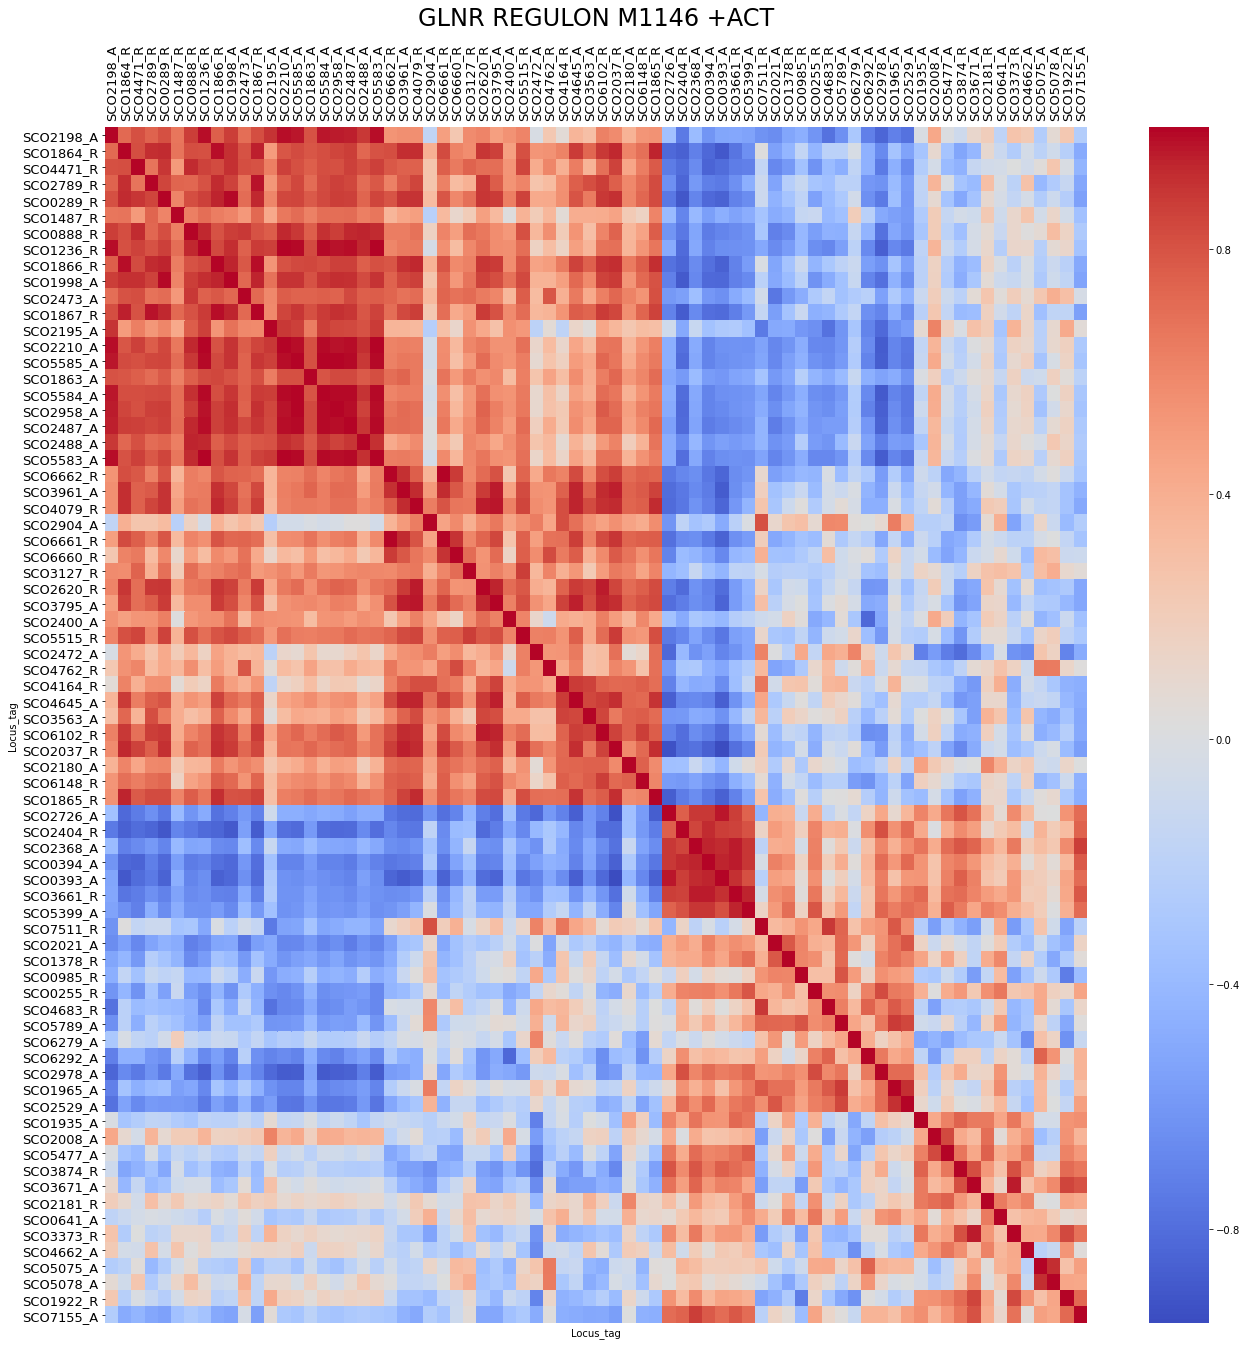

In [13]:
plt.figure(figsize=(22, 22))
plt.title('GLNR REGULON M1146 +ACT', fontsize=24, y=1.08)
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
plt.xticks(range(df6.shape[1]), df6.columns, fontsize=13, rotation=90)
plt.yticks(range(df6.shape[1]), df6.columns, fontsize=13)
cbar_kws = {"shrink":1,
            'extend':'min', 
            'extendfrac':.1, 
            "drawedges":True}
sn.heatmap(df6, annot=False, linewidths=0, square = False, cmap = 'coolwarm', cbar=True)